# Task 2.14: Regression
## Ridge Regression with Cross Validation

In this notebook we are going to  tune the hyper-parameter associated with ridge regression using cross-validation procedures. You will be provided with some already complete code as well as some code that you should complete yourself. In particular, you will have to:

* Complete the function `ridgeRegrCV(X_train, y_train, alpha,X_test)` that will make use of the pre-built implementation of Ridge regression with cross validation to select the best L2-penalty. Experiment with different cross validation methods.



# Import libraries
The required libraries for this notebook are pandas, sklearn, numpy and matplotlib.

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from pandas import *
import pandas as pd
from sklearn.datasets import load_boston, load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error

# Load the data
The data we are using is from Boston house-prices dataset, which we can access directly from the scikit learn library . It consists of 506 data points and 13 features.

In [16]:
#add another column that contains the house prices which in scikit learn datasets are considered as target
boston=load_boston() # get the data
#print(boston.keys()) # boston variable itself is a dictionary, so we can check for its keys 
print(boston.data.shape) # shape of data
#print(boston.feature_names)
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names) # convert the boston.data to a a dataframe
boston_df['Price']=boston.target # there is no column called ‘PRICE’ in the data frame because the target column is available in another attribute called target
newX=boston_df.drop('Price',axis=1) # All other features
newY=boston_df['Price'] # Boston Housing Price
boston_df.head()


(506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [17]:
X_train,X_test,y_train,y_test=train_test_split(newX,newY,test_size=0.3,random_state=3) 
#test_size= should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split
#everytime you run it without specifying random_state, you will get a different result, this is expected behavior
#print (len(X_test), len(y_test))

print('train set: {}  | test set: {}'.format(round(len(y_train)/len(newX),2),
                                                       round(len(y_test)/len(newX),2)))


train set: 0.7  | test set: 0.3


# Cross-validation for selecting the ridge regressor hyper-parameter

`Ridge()` function from scikit-learn library has a hyper-parameter **alpha**  (we also refer to this hyper-parameter as λ) that is used to tune the model. Instead of choosing alpha manually, it is better to use cross-validation to optimize the selection of the hyper-parameter.

Each alpha corresponds to a vector of thirteen ridge regression coefficients. We will create a 13×5 matrix to store the various combinations of hyper parameters and associated ridge regression coefficients (13 rows for our 13 predictors and 5 columns for our 5 generated alphas). You can of course change the number of generated alphas.


In [18]:
# generate a range of alpha values and put them in a numpy array
#r_alphas = 10**np.linspace(10,-2,100)*0.5
r_alphas = [0.001, 0.01, 0.1, 1, 10]
#print(r_alphas)



 Make use of `RidgeCV()`, which is the cross-validated `Ridge()` function from scikit-learn.

In [19]:
def ridgeRegrCVPredict(X_train, y_train, r_alphas, X_test):

    ridgecv = RidgeCV(alphas = r_alphas, fit_intercept=True)
    ridgecv.fit(X_train, y_train)

    # Next step: fit ridgecv!
    print('Best alpha value: '+ str(ridgecv.alpha_))

    Y_pred_cv = ridgecv.predict(X_test)
    return Y_pred_cv


Test your results:

Best alpha value: 0.1
Mean Squared Error (MSE) on test set (built-in cross-validation): 22.56321392468251


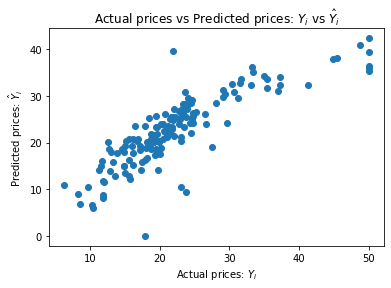

In [20]:
Y_pred_cv =  ridgeRegrCVPredict(X_train, y_train, r_alphas,X_test)
mse_cv=mean_squared_error(y_test,Y_pred_cv)
print('Mean Squared Error (MSE) on test set (built-in cross-validation): '+str(mse_cv))

plt.scatter(y_test, Y_pred_cv)
plt.xlabel("Actual prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()
